# TensorFlow - RNA
## Eduardo Gomes Sanglard - IAA 2022
### Laboratório de Inteligência Artifical - Frameworks de IA

Bases de dados trabalhadas neste notebook:

- Câncer de Mama: Redes Neurais Básico
- MNIST: Reconhecimento de dígitos
- Biomassa: Predição de Biomassa

Link para este notebook no Google Colab
https://drive.google.com/file/d/1LB-iGtfkSkUMSaJKStT7CGI_c1OqZHqM/view?usp=sharing


Importação de bibliotecas

In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Input, GRU, LSTM, Conv2D, Dropout, SimpleRNN, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.python.keras import backend
from sklearn.datasets import load_breast_cancer
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

tf.__version__

'2.12.0'

## Câncer de Mama
Carregando dataset da biblioteca sklearn

In [2]:
data = load_breast_cancer()
type(data)
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Analisando dados a serem manipulados e preditos

In [3]:
data.data.shape
data.target
data.target_names
data.feature_names
data.target.shape

(569,)

Divisão da base de treino e teste. 1/3 da base para testes e 2/3 para treinamento

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

Normalização dos dados com Standart Scaler

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Construção do modelo de rede neural básico

In [6]:
i = tf.keras.layers.Input(shape=(D,))
x = tf.keras.layers.Dense(1, activation='sigmoid')(i)
model = tf.keras.models.Model(i, x)

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Treinamento do modelo

In [8]:
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
epochs=100)

Epoch 1/100
12/12 [==============================] - 5s 30ms/step - loss: 0.6908 - accuracy: 0.5407 - val_loss: 0.6662 - val_accuracy: 0.5904
Epoch 2/100
12/12 [==============================] - 0s 14ms/step - loss: 0.6156 - accuracy: 0.6562 - val_loss: 0.5902 - val_accuracy: 0.7234
Epoch 3/100
12/12 [==============================] - 0s 14ms/step - loss: 0.5518 - accuracy: 0.7664 - val_loss: 0.5281 - val_accuracy: 0.7979
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 0.5008 - accuracy: 0.8163 - val_loss: 0.4772 - val_accuracy: 0.8564
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.4575 - accuracy: 0.8609 - val_loss: 0.4370 - val_accuracy: 0.8883
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4228 - accuracy: 0.8793 - val_loss: 0.4041 - val_accuracy: 0.9096
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.3944 - accuracy: 0.8950 - val_loss: 0.3767 - val_accuracy: 0.9096
Epoch 8/1

Métricas do modelo

In [9]:
print("Train score: ", model.evaluate(X_train, Y_train))
print("Test score: ", model.evaluate(X_test, Y_test))

12/12 [==============================] - 0s 3ms/step - loss: 0.0900 - accuracy: 0.9843
Train score:  [0.0899723693728447, 0.9842519760131836]
6/6 [==============================] - 0s 3ms/step - loss: 0.0954 - accuracy: 0.9734
Test score:  [0.09544672816991806, 0.9734042286872864]


Diminução do nível de 'loss' pelas epochs

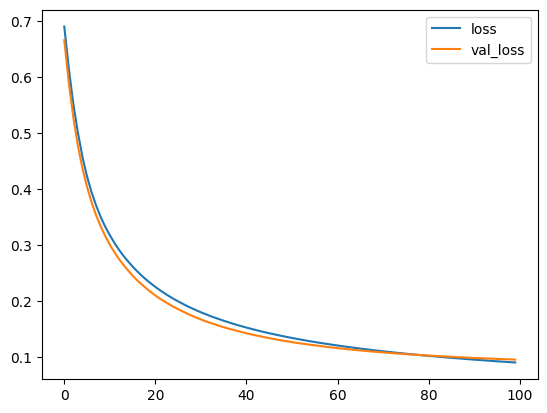

In [10]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Melhora da acurácia através das epochs

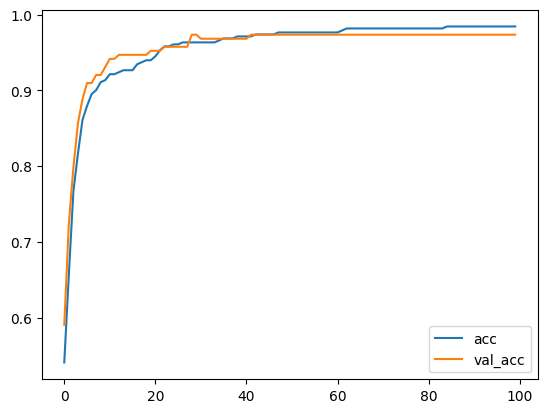

In [11]:
plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [12]:
pred = model.predict(X_test)
print(pred)

6/6 [==============================] - 0s 2ms/step
[[7.79776674e-05]
 [6.10006111e-07]
 [9.73521292e-01]
 [7.30424747e-03]
 [3.55603516e-01]
 [9.68395054e-01]
 [9.64620292e-01]
 [9.96907651e-01]
 [4.80858207e-01]
 [8.96865368e-01]
 [9.82427537e-01]
 [2.17897049e-03]
 [8.38758051e-01]
 [9.91187036e-01]
 [9.87997651e-01]
 [9.38337088e-01]
 [9.98213887e-01]
 [1.11467316e-05]
 [2.98427162e-03]
 [1.30057111e-02]
 [1.74235389e-01]
 [9.97773468e-01]
 [9.65221167e-01]
 [9.84646142e-01]
 [6.78341806e-01]
 [9.79715824e-01]
 [9.79480982e-01]
 [2.09757864e-01]
 [9.97531533e-01]
 [3.15281766e-04]
 [9.13720071e-01]
 [9.79296744e-01]
 [3.12837627e-04]
 [4.23133373e-01]
 [9.88081098e-01]
 [3.11436917e-04]
 [9.99908686e-01]
 [9.80468631e-01]
 [1.31806868e-04]
 [9.95315313e-01]
 [9.82734263e-01]
 [2.06355769e-02]
 [8.39514196e-01]
 [4.55711316e-03]
 [9.45837677e-01]
 [9.75520611e-01]
 [9.99478877e-01]
 [5.77504106e-04]
 [9.69144523e-01]
 [2.97582783e-02]
 [9.61325943e-01]
 [9.92224455e-01]
 [9.99113142e

Normalizacao dos dados preditos

In [13]:
pred = np.round(pred).flatten()
print(pred)


[0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.]


In [14]:
print("Acurácia na mão: ", np.mean(pred == Y_test))
print("Evaluate: ", model.evaluate(X_test, Y_test))
print("")
print("Acurácia: ", model.evaluate(X_test, Y_test)[1])


Acurácia na mão:  0.973404255319149
6/6 [==============================] - 0s 3ms/step - loss: 0.0954 - accuracy: 0.9734
Evaluate:  [0.09544672816991806, 0.9734042286872864]

6/6 [==============================] - 0s 3ms/step - loss: 0.0954 - accuracy: 0.9734
Acurácia:  0.9734042286872864


Mostrar a matriz de confusão

(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

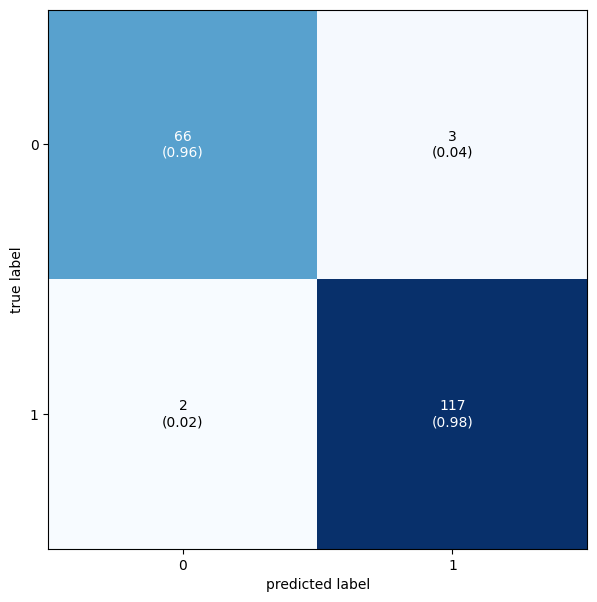

In [15]:
cm = confusion_matrix(Y_test, pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7), show_normed=True)

## MINIST

In [16]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", y_test.shape)
print("y_test.shape: ", y_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
x_train.shape:  (60000, 28, 28)
y_train.shape:  (60000,)
x_test.shape:  (10000,)
y_test.shape:  (10000,)


Normalizar os dados

In [17]:
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

Criação do modelo

In [18]:
i = tf.keras.layers.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(i)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10, activation="softmax")(x)
model = tf.keras.models.Model(i, x)

Compilação e treino do modelo

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3024 - accuracy: 0.9110 - val_loss: 0.1382 - val_accuracy: 0.9573
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1468 - accuracy: 0.9564 - val_loss: 0.1039 - val_accuracy: 0.9669
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1090 - accuracy: 0.9665 - val_loss: 0.0878 - val_accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0900 - accuracy: 0.9722 - val_loss: 0.0773 - val_accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0767 - accuracy: 0.9764 - val_loss: 0.0751 - val_accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0664 - accuracy: 0.9788 - val_loss: 0.0712 - val_accuracy: 0.9768
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0570 - accuracy: 0.9815 - val_loss: 0.0702 - val_accuracy:

### Avaliação do modelo

Plotar a função de perda

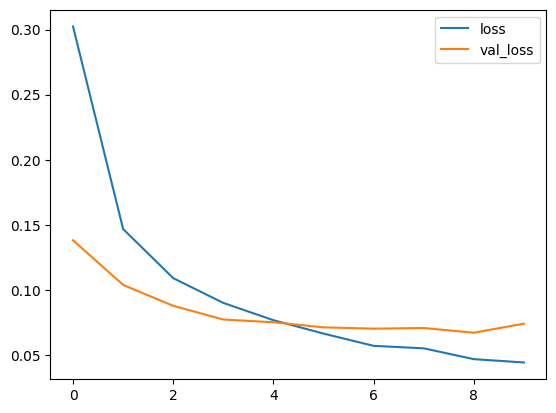

In [20]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

Plotar acurácia

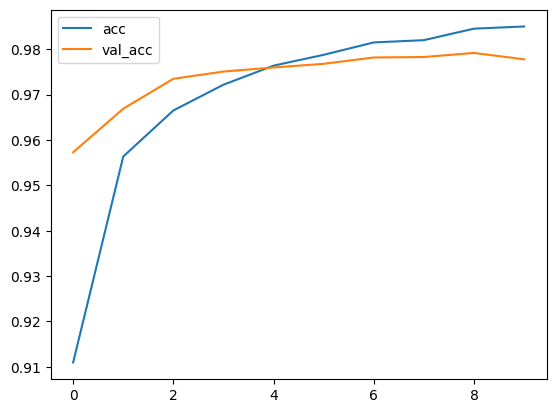

In [21]:
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

### Predições e resultados

predict() gera o valor de todos os K neurônios de saída
argmax() dá o índice do neurônio com maior valor (softmax)

In [22]:
print( model.evaluate(x_test, y_test) )

313/313 [==============================] - 1s 3ms/step - loss: 0.0741 - accuracy: 0.9778
[0.0740848109126091, 0.9778000116348267]


Mostrar a matriz de confusão

313/313 [==============================] - 1s 2ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

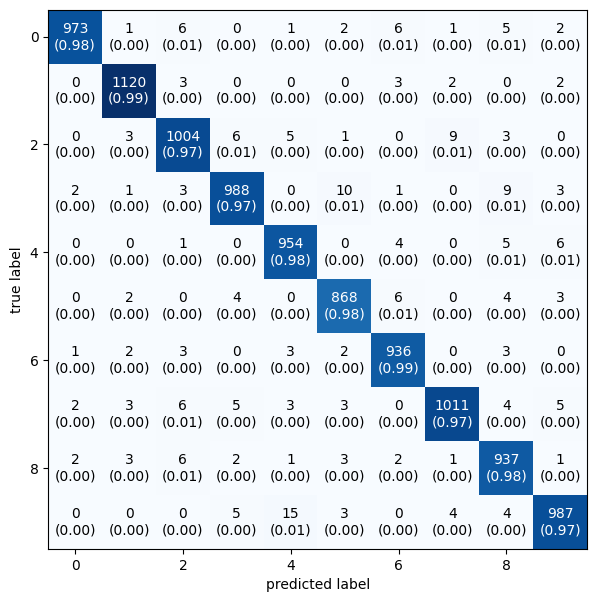

In [23]:
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_pred, y_test)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7), show_normed=True)

Text(0.5, 1.0, 'True label: 3 Predicted: 2')

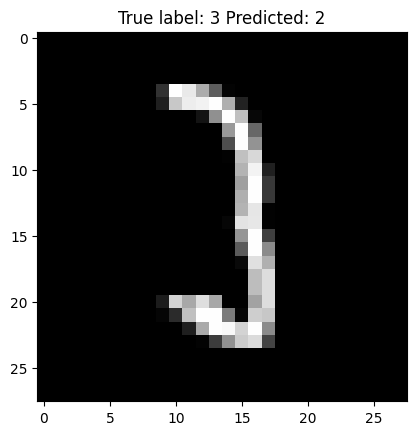

In [24]:
# mostrar algumas classificações erradas
misclassified = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]))

## Biomassa
Download da base de dados de uma fonte externa no formato CSV

In [25]:
!wget http://www.razer.net.br/datasets/Biomassa_REG.csv

--2023-05-01 01:26:34--  http://www.razer.net.br/datasets/Biomassa_REG.csv
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82988 (81K) [text/csv]
Saving to: ‘Biomassa_REG.csv’

Biomassa_REG.csv    100%[===================>]  81.04K   191KB/s    in 0.4s    

2023-05-01 01:26:36 (191 KB/s) - ‘Biomassa_REG.csv’ saved [82988/82988]



Leitura e normalização dos valores numéricos decimais

In [26]:
data = pd.read_csv("Biomassa_REG.csv", sep=";", decimal=",").values
X = data[:,0:3].astype(float)
Y = data[:,3].astype(float)

Divisão da base de treino e teste. 1/3 da base para testes e 2/3 para treinamento

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.33)
dap_train = x_train[:,0]
h_train = x_train[:,1]
dap_test = x_test[:,0]
h_test = x_test[:,1]

Construção do modelo de rede neural

In [28]:
i = tf.keras.layers.Input(shape=(3,))
x = tf.keras.layers.Dense(50, activation="relu")(i)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.models.Model(i, x)

Definição de funções de métrica de desempenho para modelo de regressão

In [29]:
def rmse(y_true, y_pred):
  return backend.sqrt(backend.mean( backend.square(y_pred - y_true), axis=-1) )
def r2(y_true, y_pred):
  media = backend.mean(y_true)
  num = backend.sum (backend.square(y_true - y_pred))
  den = backend.sum (backend.square(y_true - media))
  return (1.0 - num/den)

Treinamento do modelo utilizando otimizador Adam

In [30]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
# optimizer=tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.5)
# optimizer=tf.keras.optimizers.RMSprop(0.01)
model.compile(optimizer=optimizer,loss="mse",metrics=[rmse, r2])

Adicionando Early Stopping para parar o treinamento se não houver melhora após 20 epochs

In [31]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)
r = model.fit(x_train, y_train,epochs=1500,validation_data=(x_test, y_test),callbacks=[early_stop])

Epoch 1/1500
84/84 [==============================] - 2s 7ms/step - loss: 12130654.0000 - rmse: 1521.7186 - r2: -0.5444 - val_loss: 5014546.0000 - val_rmse: 1517.9092 - val_r2: -0.2556
Epoch 2/1500
84/84 [==============================] - 0s 4ms/step - loss: 9081908.0000 - rmse: 1490.8342 - r2: -0.5274 - val_loss: 4039800.7500 - val_rmse: 1144.7765 - val_r2: 0.1238
Epoch 3/1500
84/84 [==============================] - 0s 5ms/step - loss: 7763253.5000 - rmse: 1151.9954 - r2: 0.2738 - val_loss: 3553102.5000 - val_rmse: 879.3121 - val_r2: 0.2492
Epoch 4/1500
84/84 [==============================] - 0s 5ms/step - loss: 7073673.5000 - rmse: 970.1938 - r2: 0.0620 - val_loss: 3451448.2500 - val_rmse: 656.6770 - val_r2: 0.5220
Epoch 5/1500
84/84 [==============================] - 0s 5ms/step - loss: 6665838.5000 - rmse: 880.4088 - r2: 0.3346 - val_loss: 3295830.2500 - val_rmse: 710.8491 - val_r2: 0.3494
Epoch 6/1500
84/84 [==============================] - 0s 5ms/step - loss: 6458952.0000 - rm

Diminuição da 'loss' e validation loss através das epochs

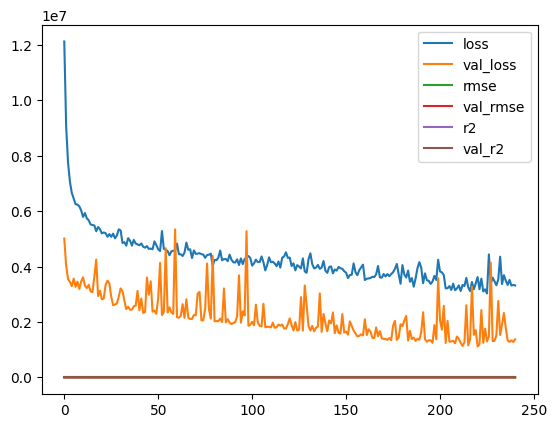

In [32]:
plt.plot( r.history["loss"], label="loss" )
plt.plot( r.history["val_loss"], label="val_loss" )
plt.legend()
plt.plot( r.history["rmse"], label="rmse" )
plt.plot( r.history["val_rmse"], label="val_rmse" )
plt.legend()
plt.plot( r.history["r2"], label="r2" )
plt.plot( r.history["val_r2"], label="val_r2" )
plt.legend()

Calculando métricas de desempenho para modelo de regressão

In [33]:
y_pred = model.predict(x_test).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("mse = ", mse)
print("rmse = ", rmse)
print("r2 = ", r2)

42/42 [==============================] - 0s 1ms/step
mse =  1120209.9829669234
rmse =  1058.3997274030844
r2 =  0.892588266901649


Comparação entre valores preditos e reais

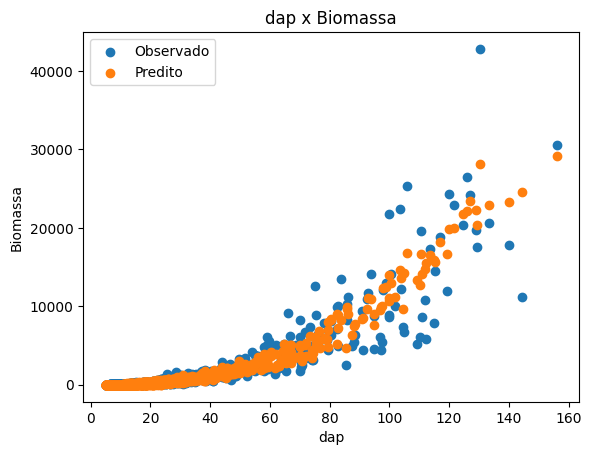

In [34]:
plt.scatter(dap_test, y_test, label="Observado")
plt.scatter(dap_test, y_pred, label="Predito")
plt.title("dap x Biomassa")
plt.xlabel("dap")
plt.ylabel("Biomassa")
plt.legend()
plt.show()